In [1]:
import fastbook
fastbook.setup_book()

C:\Users\heybl\AppData\Local\Programs\Python\Python39\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
from fastai.vision.all import *

In [3]:
url = 'https://sou.box.com/shared/static/voeyo9hzhfg6q5ms0kwnm3ocsie84nku.tgz'

In [4]:
path = untar_data(url)

In [5]:
train_path = path/'train'
get_image_files(train_path)

(#14998) [Path('C:/Users/heybl/.fastai/data/voeyo9hzhfg6q5ms0kwnm3ocsie84nku/train/cat_1.jpg'),Path('C:/Users/heybl/.fastai/data/voeyo9hzhfg6q5ms0kwnm3ocsie84nku/train/cat_10.jpg'),Path('C:/Users/heybl/.fastai/data/voeyo9hzhfg6q5ms0kwnm3ocsie84nku/train/cat_100.jpg'),Path('C:/Users/heybl/.fastai/data/voeyo9hzhfg6q5ms0kwnm3ocsie84nku/train/cat_1000.jpg'),Path('C:/Users/heybl/.fastai/data/voeyo9hzhfg6q5ms0kwnm3ocsie84nku/train/cat_1001.jpg'),Path('C:/Users/heybl/.fastai/data/voeyo9hzhfg6q5ms0kwnm3ocsie84nku/train/cat_1002.jpg'),Path('C:/Users/heybl/.fastai/data/voeyo9hzhfg6q5ms0kwnm3ocsie84nku/train/cat_1003.jpg'),Path('C:/Users/heybl/.fastai/data/voeyo9hzhfg6q5ms0kwnm3ocsie84nku/train/cat_1004.jpg'),Path('C:/Users/heybl/.fastai/data/voeyo9hzhfg6q5ms0kwnm3ocsie84nku/train/cat_1005.jpg'),Path('C:/Users/heybl/.fastai/data/voeyo9hzhfg6q5ms0kwnm3ocsie84nku/train/cat_1006.jpg')...]

In [6]:
def is_cat(x): return x[0] == "c"

In [7]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(train_path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(240))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [30]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

C:\Users\heybl\AppData\Local\Programs\Python\Python39\lib\site-packages\fastai\callback\schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0005754399462603033)

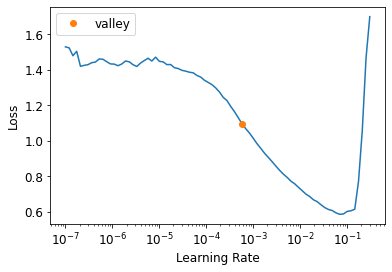

In [31]:
learn.lr_find()

In [29]:
learn.fine_tune(25,0.0005754399462603033)
#best = 0.007669

epoch,train_loss,valid_loss,error_rate,time
0,0.193284,0.161303,0.068023,02:39


C:\Users\heybl\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\TiffImagePlugin.py:811: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [50]:
test_data = learn.dls.test_dl(get_image_files(path/'test'))

In [51]:
preds = learn.get_preds(dl=test_data,with_decoded=True)

In [52]:
preds

(tensor([[5.9552e-07, 1.0000e+00],
         [1.0000e+00, 1.8168e-09],
         [1.0000e+00, 2.1939e-07],
         ...,
         [1.0384e-05, 9.9999e-01],
         [1.4802e-03, 9.9852e-01],
         [5.1215e-08, 1.0000e+00]]),
 None,
 tensor([1, 0, 0,  ..., 1, 1, 1]))

In [25]:
test_path_images = get_image_files(path/'test')
str(test_path_images[100]).split('\\')[7].split('.')[0]

'1088'

In [53]:
data = {"id": [], 'label': []}

test_path_images = get_image_files(path/'test')

for i in range(len(test_path_images)):
    data['id'].append(str(test_path_images[i]).split('\\')[7].split('.')[0])
    data['label'].append(int(preds[2][i]))

data

{'id': ['1',
  '10',
  '100',
  '1000',
  '10000',
  '1001',
  '1002',
  '1003',
  '1004',
  '1005',
  '1006',
  '1007',
  '1008',
  '1009',
  '101',
  '1010',
  '1011',
  '1012',
  '1013',
  '1014',
  '1015',
  '1016',
  '1017',
  '1018',
  '1019',
  '102',
  '1020',
  '1021',
  '1022',
  '1023',
  '1024',
  '1025',
  '1026',
  '1027',
  '1028',
  '1029',
  '103',
  '1030',
  '1031',
  '1032',
  '1033',
  '1034',
  '1035',
  '1036',
  '1037',
  '1038',
  '1039',
  '104',
  '1040',
  '1041',
  '1042',
  '1043',
  '1044',
  '1045',
  '1046',
  '1047',
  '1048',
  '1049',
  '105',
  '1050',
  '1051',
  '1052',
  '1053',
  '1054',
  '1055',
  '1056',
  '1057',
  '1058',
  '1059',
  '106',
  '1060',
  '1061',
  '1062',
  '1063',
  '1064',
  '1065',
  '1066',
  '1067',
  '1068',
  '1069',
  '107',
  '1070',
  '1071',
  '1072',
  '1073',
  '1074',
  '1075',
  '1076',
  '1077',
  '1078',
  '1079',
  '108',
  '1080',
  '1081',
  '1082',
  '1083',
  '1084',
  '1085',
  '1086',
  '1087',
  '1088

In [54]:
import pandas as pd
df = pd.DataFrame(data)
df

,id,label
0,1,1
1,10,0
2,100,0
3,1000,1
4,10000,1
...,...,...
9995,9995,1
9996,9996,1
9997,9997,1
9998,9998,1


In [58]:
df.to_csv('out.csv', index=False)

In [ ]:
learn.export()
load_learner()